In [1]:
#Get the data from the kaggel 
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"praneethkumar12","key":"f6db1f3966165e81ae160ea0e14da28f"}'}

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle datasets download -d ritesaluja/bank-note-authentication-uci-data

  0% 0.00/19.2k [00:00<?, ?B/s]
100% 19.2k/19.2k [00:00<00:00, 34.5MB/s]


In [14]:
#unzip the file
#unzip the zile
from zipfile import ZipFile
file_name='/content/bank-note-authentication-uci-data.zip'

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [16]:
#Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
import keras
from tensorflow.keras.layers import Dense,Dropout,MaxPooling2D
from kerastuner.tuners import RandomSearch
from tensorflow.keras.models import Sequential

In [17]:
#Load the bank Note dataset
df = pd.read_csv("/content/BankNote_Authentication.csv")
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [18]:
#Check the count of target classes and confirm is balanced data or not
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [19]:
#Check the shape of the data set
print("Number of columns: ",df.shape[1])
print("Number of observations: ",df.shape[0])

Number of columns:  5
Number of observations:  1372


This is not a many rows of the data for neural networks and suggest that a small netwrok,perhaps with regularization, would be appropriate.

In [20]:
#Check the summary of the complete data using describe function which returns complete statistical information of the data
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


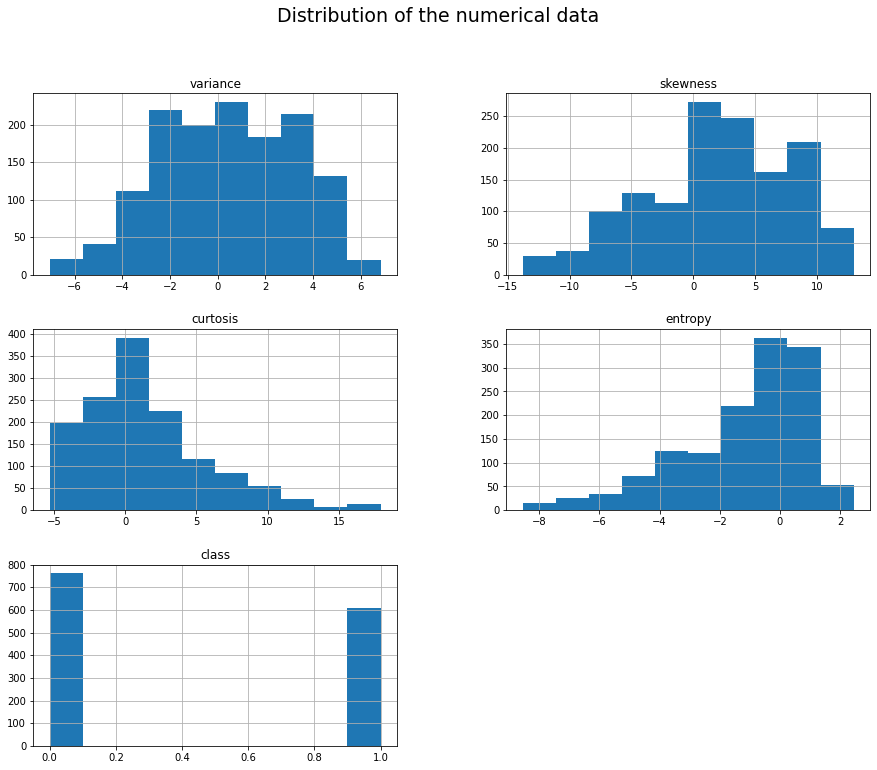

In [21]:
#Check the distribution of the data using the hist plot
df.hist(figsize=(15,12))
plt.suptitle("Distribution of the numerical data",fontsize=19)
plt.show()

As we can observe that some of the variables in our dataset have some skewness i.e.,cutosis and entrophy show right and left skewnees whereas in variance and skewness display's like it is a gaussina distribution. We need to handle it by using the some of the feature transformation techniques such as "Power transform","Box cox transformation" or "Log normal tranformation". Genrally logarthemic transformation perform well on the skewness data, it converts the data in to gaussian distribution or normal distribuiton.

## Neural netwrok

In [22]:
#Check the data type and null values in the data
d_sum = pd.DataFrame({'Dtype':df.dtypes,"Null_values":df.isnull().sum()})
d_sum

,Dtype,Null_values
variance,float64,0
skewness,float64,0
curtosis,float64,0
entropy,float64,0
class,int64,0


In [23]:
#Split the data in to x and y
x = df.drop(columns=['class'],axis=1)
y = df['class']

We will develop a Multilayer Perceptron (MLP) model for the dataset using TensorFlow.

We cannot know what model architecture of learning hyperparameters would be good or best for this dataset, so we must experiment and discover what works well.

Given that the dataset is small, a small batch size is probably a good idea, e.g. 16 or 32 rows. Using the Adam version of stochastic gradient descent is a good idea when getting started as it will automatically adapt the learning rate and works well on most datasets.

Before we evaluate models in earnest, it is a good idea to review the learning dynamics and tune the model architecture and learning configuration until we have stable learning dynamics, then look at getting the most out of the model.

We can do this by using a simple train/test split of the data and review plots of the learning curves. This will help us see if we are over-learning or under-learning; then we can adapt the configuration accordingly.

Now we are going to split the data set in to training set and validation set by the rule of 80/20 rule ie.,80% training set and 20% testing set

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.2,random_state=0)

We can define Multilayer perceptron neural network

In [25]:
from tensorflow.keras.activations import relu,sigmoid,swish,softmax,softplus
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras import activations

As mentioned in Task sheet, we need to select the best performing activation function with out using Tuning the parameters of the activation functions with the gridsearh cv or brute force.

Let's try with the different activation functions, compare it, then select the best outperforming activation function for our model.

### Activation functions.
1. Sigmiod.
2. Softmax.
3. Relu.
4. LeakyRelu.
5. Swish.
6. ELU
7. Softplus.
8. Prelu.

### 1. Sigmoid

In [47]:
#initialize the model 
feat = x.shape[1]
model = Sequential()
model.add(Dense(50,activation='sigmoid',input_shape=(feat,)))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [48]:
hist_sig = model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=50,batch_size=32,verbose=1)

Epoch 1/50
35/35 [==============================] - 1s 6ms/step - loss: 0.8035 - accuracy: 0.4603 - val_loss: 0.6575 - val_accuracy: 0.6691
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6024 - accuracy: 0.7767 - val_loss: 0.5280 - val_accuracy: 0.8545
Epoch 3/50
35/35 [==============================] - 0s 3ms/step - loss: 0.5071 - accuracy: 0.8733 - val_loss: 0.4476 - val_accuracy: 0.9309
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.4326 - accuracy: 0.9298 - val_loss: 0.3814 - val_accuracy: 0.9418
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.3688 - accuracy: 0.9581 - val_loss: 0.3261 - val_accuracy: 0.9600
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.3137 - accuracy: 0.9699 - val_loss: 0.2783 - val_accuracy: 0.9709
Epoch 7/50
35/35 [==============================] - 0s 2ms/step - loss: 0.2677 - accuracy: 0.9754 - val_loss: 0.2382 - val_accuracy: 0.9636
Epoch 8/50
35/35 [==

In [73]:
def loss_plot(hist):
  plt.plot(hist.history['loss'],label=['Training_Loss'])
  plt.plot(hist.history['val_loss'],label=['Validation_loss'])
  plt.title("Loss plot")
  plt.xlabel("Epochs")
  plt.show()

def acc_plot(hist):
  plt.plot(hist.history['accuracy'],label=['Training_Loss'])
  plt.plot(hist.history['val_accuracy'],label=['Validation_loss'])
  plt.title("Accuracy plot")
  plt.xlabel("Epochs")
  plt.show()

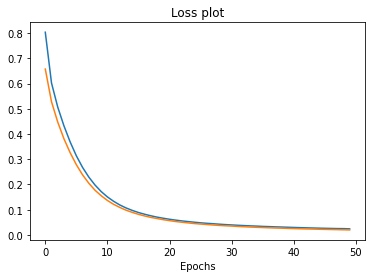

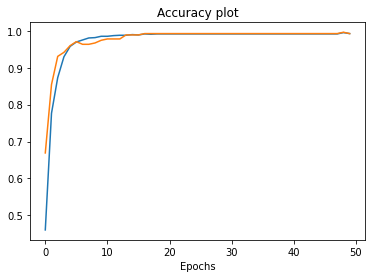

In [74]:
#Loss and accuracy plot
loss_plot(hist_sig)
acc_plot(hist_sig)

By using the activation function as sigmoid it shows there is no increase in accuracy and validation accuarcy

### Relu

In [93]:
#initialize the model 
feat = x.shape[1]
r_model = Sequential()
r_model.add(Dense(50,activation='relu',input_shape=(feat,)))
r_model.add(Dense(1,activation='sigmoid'))
r_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [94]:
hist_rel = r_model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=50,batch_size=32,verbose=1)

Epoch 1/50
35/35 [==============================] - 1s 7ms/step - loss: 0.6201 - accuracy: 0.5843 - val_loss: 0.4295 - val_accuracy: 0.7964
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.3700 - accuracy: 0.8806 - val_loss: 0.2871 - val_accuracy: 0.9455
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.2517 - accuracy: 0.9663 - val_loss: 0.2056 - val_accuracy: 0.9673
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.1816 - accuracy: 0.9809 - val_loss: 0.1537 - val_accuracy: 0.9745
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.1378 - accuracy: 0.9881 - val_loss: 0.1197 - val_accuracy: 0.9818
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.1081 - accuracy: 0.9927 - val_loss: 0.0977 - val_accuracy: 0.9818
Epoch 7/50
35/35 [==============================] - 0s 3ms/step - loss: 0.0881 - accuracy: 0.9927 - val_loss: 0.0803 - val_accuracy: 0.9891
Epoch 8/50
35/35 [==

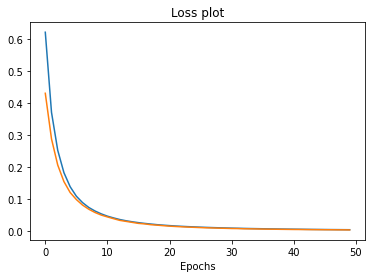

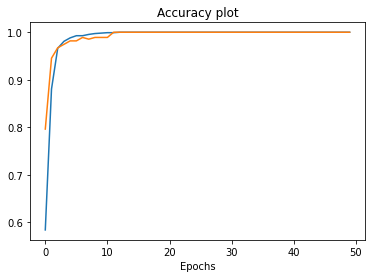

In [95]:
#Loss and accuracy plot
loss_plot(hist_rel)
acc_plot(hist_rel)

### LeakyRelu

In [108]:
#initialize the model 
feat = x.shape[1]
l_model = Sequential()
l_model.add(Dense(10,activation=LeakyReLU(alpha=0.01),input_shape=(feat,)))
l_model.add(Dense(1,activation='sigmoid'))
l_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [109]:
hist_lrel = l_model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=50,batch_size=32,verbose=1)

Epoch 1/50
35/35 [==============================] - 1s 6ms/step - loss: 0.7897 - accuracy: 0.6427 - val_loss: 0.7202 - val_accuracy: 0.6691
Epoch 2/50
35/35 [==============================] - 0s 3ms/step - loss: 0.6344 - accuracy: 0.7375 - val_loss: 0.5765 - val_accuracy: 0.7564
Epoch 3/50
35/35 [==============================] - 0s 3ms/step - loss: 0.5124 - accuracy: 0.8195 - val_loss: 0.4612 - val_accuracy: 0.8073
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.4152 - accuracy: 0.8423 - val_loss: 0.3722 - val_accuracy: 0.8545
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.3407 - accuracy: 0.8906 - val_loss: 0.3038 - val_accuracy: 0.9309
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.2814 - accuracy: 0.9699 - val_loss: 0.2500 - val_accuracy: 0.9745
Epoch 7/50
35/35 [==============================] - 0s 2ms/step - loss: 0.2292 - accuracy: 0.9799 - val_loss: 0.1982 - val_accuracy: 0.9782
Epoch 8/50
35/35 [==

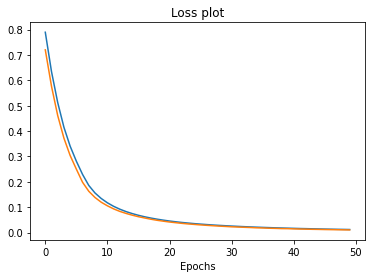

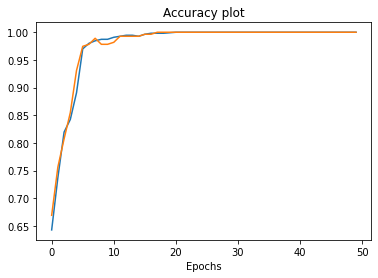

In [110]:
#Loss and accuracy plot
loss_plot(hist_lrel)
acc_plot(hist_lrel)

### Swish

In [83]:
#initialize the model 
feat = x.shape[1]
swish_model = Sequential()
swish_model.add(Dense(50,activation='swish',input_shape=(feat,)))
swish_model.add(Dense(1,activation='sigmoid'))
swish_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [84]:
hist_swish = swish_model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=50,batch_size=32,verbose=1)

Epoch 1/50
35/35 [==============================] - 1s 15ms/step - loss: 0.8978 - accuracy: 0.3674 - val_loss: 0.6152 - val_accuracy: 0.6800
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.4960 - accuracy: 0.8159 - val_loss: 0.3673 - val_accuracy: 0.9564
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.3121 - accuracy: 0.9480 - val_loss: 0.2474 - val_accuracy: 0.9855
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.2158 - accuracy: 0.9809 - val_loss: 0.1789 - val_accuracy: 0.9855
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.1594 - accuracy: 0.9845 - val_loss: 0.1378 - val_accuracy: 0.9782
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.1240 - accuracy: 0.9854 - val_loss: 0.1100 - val_accuracy: 0.9782
Epoch 7/50
35/35 [==============================] - 0s 2ms/step - loss: 0.1002 - accuracy: 0.9872 - val_loss: 0.0903 - val_accuracy: 0.9818
Epoch 8/50
35/35 [=

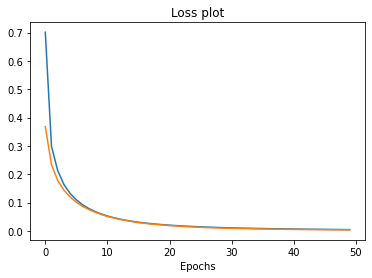

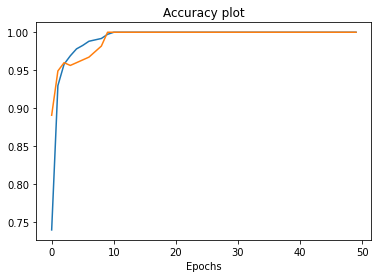

In [82]:
#Loss and accuracy plot
loss_plot(hist_swish)
acc_plot(hist_swish)

### ELU

In [87]:
#initialize the model 
feat = x.shape[1]
elu_model = Sequential()
elu_model.add(Dense(50,activation=ELU(),input_shape=(feat,)))
elu_model.add(Dense(1,activation='sigmoid'))
elu_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [88]:
hist_elu = elu_model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=50,batch_size=32,verbose=1)

Epoch 1/50
35/35 [==============================] - 1s 6ms/step - loss: 0.5351 - accuracy: 0.7803 - val_loss: 0.3488 - val_accuracy: 0.8945
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.3016 - accuracy: 0.9234 - val_loss: 0.2362 - val_accuracy: 0.9491
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.2076 - accuracy: 0.9626 - val_loss: 0.1712 - val_accuracy: 0.9600
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9745 - val_loss: 0.1326 - val_accuracy: 0.9636
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.1207 - accuracy: 0.9763 - val_loss: 0.1073 - val_accuracy: 0.9745
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.0977 - accuracy: 0.9863 - val_loss: 0.0882 - val_accuracy: 0.9818
Epoch 7/50
35/35 [==============================] - 0s 3ms/step - loss: 0.0807 - accuracy: 0.9918 - val_loss: 0.0744 - val_accuracy: 0.9818
Epoch 8/50
35/35 [==

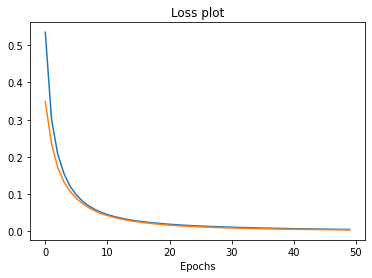

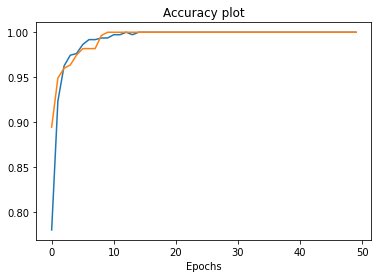

In [89]:
#Loss and accuracy plot
loss_plot(hist_elu)
acc_plot(hist_elu)

### PRelu

In [96]:
#initialize the model 
feat = x.shape[1]
p_model = Sequential()
p_model.add(Dense(50,activation=PReLU(),input_shape=(feat,)))
p_model.add(Dense(1,activation='sigmoid'))
p_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [97]:
hist_pr = p_model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=50,batch_size=32,verbose=1)

Epoch 1/50
35/35 [==============================] - 1s 6ms/step - loss: 0.6667 - accuracy: 0.6673 - val_loss: 0.4236 - val_accuracy: 0.8727
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.3684 - accuracy: 0.8979 - val_loss: 0.2861 - val_accuracy: 0.9382
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.2584 - accuracy: 0.9544 - val_loss: 0.2122 - val_accuracy: 0.9491
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.1926 - accuracy: 0.9681 - val_loss: 0.1635 - val_accuracy: 0.9600
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.1498 - accuracy: 0.9754 - val_loss: 0.1300 - val_accuracy: 0.9673
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.1200 - accuracy: 0.9827 - val_loss: 0.1060 - val_accuracy: 0.9745
Epoch 7/50
35/35 [==============================] - 0s 2ms/step - loss: 0.0988 - accuracy: 0.9945 - val_loss: 0.0873 - val_accuracy: 0.9818
Epoch 8/50
35/35 [==

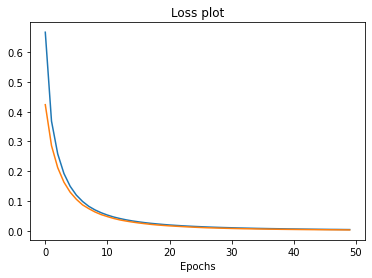

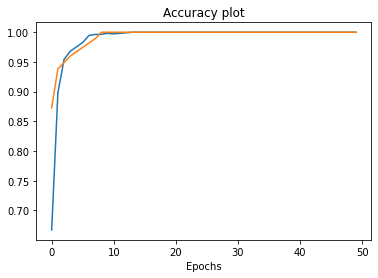

In [98]:
#Loss and accuracy plot
loss_plot(hist_pr)
acc_plot(hist_pr)

As we Experiment on the different activation functions we have , by considering all the cases, **LeakyRelu** activation function perform well both on train and test data, it converges quickle through the global minima.

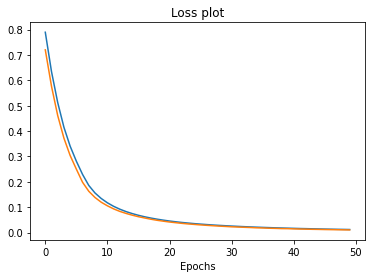

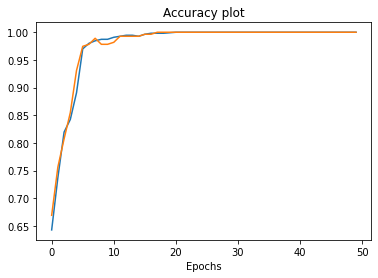

In [111]:
#Loss and accuracy plot for the LeakyRelu
loss_plot(hist_lrel)
acc_plot(hist_lrel)

At the end of training, we will evaluate the model’s performance on the test dataset and report performance as the classification accuracy.

In [112]:
from sklearn.metrics import accuracy_score
# predict test set
yhat = l_model.predict_classes(x_val)
# evaluate predictions
score = accuracy_score(y_val, yhat)
print('Accuracy : %.3f' % score)

Accuracy : 1.000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [113]:
l_model.trainable_weights

[<tf.Variable 'dense_56/kernel:0' shape=(4, 10) dtype=float32, numpy=
 array([[-1.0191457 ,  0.43691105, -0.24920474,  0.91669387,  1.1209365 ,
          0.17461905,  0.30388984,  0.38420722, -1.1818974 , -0.73866546],
        [ 0.12706555,  0.8034793 , -0.09776583,  0.34244478,  0.5177767 ,
         -0.1604144 ,  0.9389532 ,  0.05366395, -0.3934279 , -0.01984872],
        [ 0.64960986, -0.17276475, -0.56822956, -0.01981766,  0.8746438 ,
          0.28390008,  0.78429264, -0.73570484, -0.09717001, -0.9764796 ],
        [ 0.21970525,  0.14473073, -0.7532152 , -0.37142417, -0.3458716 ,
          0.26863584,  0.07149642,  0.34521458,  1.3007131 ,  0.13457708]],
       dtype=float32)>,
 <tf.Variable 'dense_56/bias:0' shape=(10,) dtype=float32, numpy=
 array([ 0.30863136, -0.35084096,  0.6415316 ,  0.05500666,  0.44968727,
        -0.01826408, -0.04380936,  0.17380986,  0.8931041 ,  0.7091936 ],
       dtype=float32)>,
 <tf.Variable 'dense_57/kernel:0' shape=(10, 1) dtype=float32, numpy=
 a

In [126]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score
print(classification_report(y_val,yhat))
print(confusion_matrix(y_val,yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       118

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

[[157   0]
 [  0 118]]
